In [1]:
!pip install -U pymoo

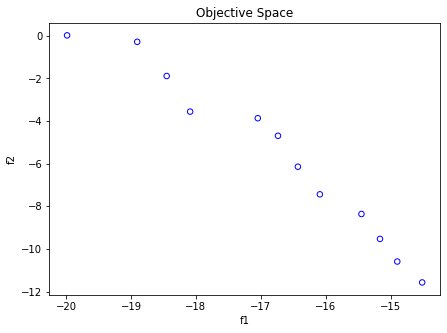

[[-1.07761523e+00 -8.67195193e-01 -1.08108211e+00]
 [-5.75091357e-01 -2.57680616e-03  3.48712046e-03]
 [-1.08054663e+00 -8.55354305e-03 -1.09542759e+00]
 [-3.10182852e-03 -2.90288544e-03  2.75602917e-04]
 [-8.37349829e-01 -1.37900877e-03  3.58670617e-03]
 [-1.09547319e+00 -6.92564098e-01 -1.08415436e+00]
 [-1.12554731e+00 -1.14102922e+00 -1.12847886e+00]
 [-1.05571219e+00 -9.50226447e-04  3.84084823e-03]
 [-9.61695418e-01  8.57882771e-03 -1.00597490e+00]
 [-1.11978434e+00 -9.77814756e-01 -1.08398722e+00]
 [-8.20080522e-01 -1.20636757e-03 -9.63549005e-01]
 [-5.07603520e-01 -2.92784603e-03 -1.10856097e+00]]


In [2]:
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.termination import get_termination
from pymoo.optimize import minimize
from pymoo.util.ref_dirs import get_reference_directions
import numpy as np
import matplotlib.pyplot as plt

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=3,
                         n_obj=2,
                         n_ieq_constr=0,
                         xl=np.array([-5,-5,-5]),
                         xu=np.array([5,5,5]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 0
        f2 = 0
        for i in range(2):
            f1 += -10*np.exp(-0.2*np.sqrt(x[i]**2+x[i+1]**2))
        for i in range(3):
            f2 += np.abs(x[i])**0.8+5*np.sin(x[i]**3) 

        out["F"] = [f1, f2]

problem = MyProblem()

algorithm = NSGA3(
    pop_size=100,
    n_offsprings=70,
    ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_partitions=12),
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

termination = get_termination("n_gen", 80)

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=False)

X = res.X
F = res.F

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.ylabel('f2')
plt.xlabel('f1')
plt.show()

print(X)